<a href="https://colab.research.google.com/github/Naheemashaik/AIAC/blob/main/NLP_Assignment_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install -U spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from spacy.matcher import Matcher


In [12]:
nlp = spacy.load("en_core_web_sm")


In [13]:
nlp.pipe_names


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [14]:
df = pd.read_csv("arxiv_data.csv")
df.head()


,categories,abstract
0,cs.AI,This is an abstract about artificial intellige...
1,math.CO,A mathematical abstract discussing combinatorics.
2,cs.CV,An abstract focusing on computer vision techni...
3,cs.LG,Machine learning algorithms and their applicat...
4,stat.ML,Statistical methods in machine learning.


In [15]:
cs_abstracts = df[df['categories'].str.contains('cs', na=False)]['abstract'].head(5)

text = " ".join(cs_abstracts)


In [16]:
doc = nlp(text)

for token in doc[:20]:
    print(token.text, token.pos_)


This PRON
is AUX
an DET
abstract NOUN
about ADP
artificial ADJ
intelligence NOUN
. PUNCT
An DET
abstract ADJ
focusing VERB
on ADP
computer NOUN
vision NOUN
techniques NOUN
. PUNCT
Machine NOUN
learning VERB
algorithms NOUN
and CCONJ


In [17]:
noun_phrases = []

for chunk in doc.noun_chunks:
    noun_phrases.append(chunk.text.lower())

np_freq = Counter(noun_phrases)
top_noun_phrases = np_freq.most_common(10)

top_noun_phrases


[('this', 1),
 ('an abstract', 1),
 ('artificial intelligence', 1),
 ('computer vision techniques', 1),
 ('machine learning algorithms', 1),
 ('their applications', 1)]

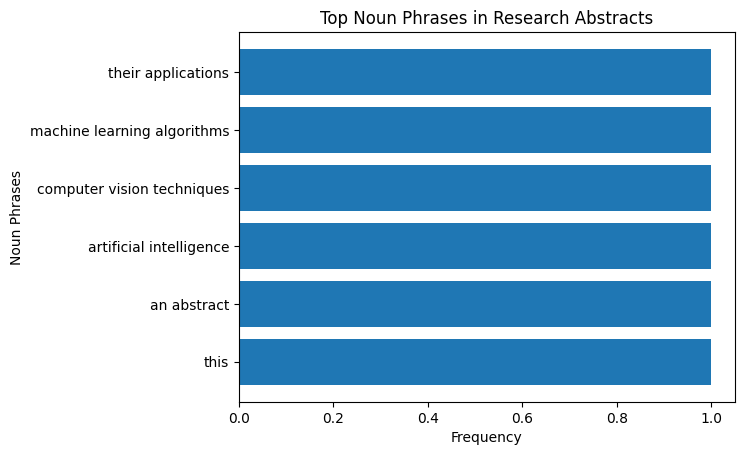

In [18]:
phrases, counts = zip(*top_noun_phrases)

plt.figure()
plt.barh(phrases, counts)
plt.xlabel("Frequency")
plt.ylabel("Noun Phrases")
plt.title("Top Noun Phrases in Research Abstracts")
plt.show()


In [19]:
entities = [(ent.text, ent.label_) for ent in doc.ents]

entity_freq = Counter([ent[1] for ent in entities])
entity_freq


Counter()

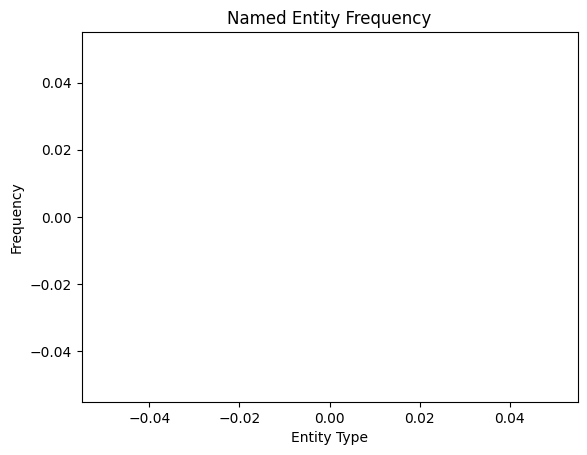

In [20]:
labels = entity_freq.keys()
values = entity_freq.values()

plt.figure()
plt.bar(labels, values)
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Named Entity Frequency")
plt.show()


In [21]:
matcher = Matcher(nlp.vocab)

pattern1 = [{"LOWER": "machine"}, {"LOWER": "learning"}]
pattern2 = [{"LOWER": "neural"}, {"LOWER": "network"}]
pattern3 = [{"LOWER": "deep"}, {"LOWER": "learning"}]

matcher.add("TECH_TERMS", [pattern1, pattern2, pattern3])


In [22]:
matches = matcher(doc)

for match_id, start, end in matches:
    print(doc[start:end].text)


Machine learning
